In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Mnist_data.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(42000, 785)

In [4]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
print(X.shape, y.shape)

(42000, 784) (42000,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(33600, 784) (8400, 784)


In [7]:
knn = KNeighborsClassifier()
print("Training KNN on original data...")
knn.fit(X_train, y_train)

Training KNN on original data...


KNeighborsClassifier()

In [8]:
# Make predictions
y_pred = knn.predict(X_test)

# Check the accuracy and report
print("\n👉 Accuracy Before PCA :", accuracy_score(y_test, y_pred))
print("👉 Before PCA :")
print(classification_report(y_test, y_pred))


👉 Accuracy Before PCA : 0.9648809523809524
👉 Before PCA :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       816
           1       0.94      1.00      0.97       909
           2       0.99      0.94      0.96       846
           3       0.96      0.96      0.96       937
           4       0.98      0.97      0.98       839
           5       0.96      0.95      0.96       702
           6       0.97      0.99      0.98       785
           7       0.96      0.96      0.96       893
           8       0.99      0.93      0.96       835
           9       0.94      0.95      0.95       838

    accuracy                           0.96      8400
   macro avg       0.97      0.96      0.96      8400
weighted avg       0.97      0.96      0.96      8400



## Applying PCA :

In [9]:
# ---  Standardization ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
def pca_scratch(X_train_scaled, X_test_scaled, n_components):
    """
    Returns:
        X_train_pca : The transformed training data.
        X_test_pca  : The transformed testing data.
        projection_matrix : The matrix used for the projection.
    """
    # STEP 1: Compute the Covariance Matrix on the training data
    cov_matrix = np.cov(X_train_scaled, rowvar=False)

    # STEP 2: Calculate Eigenvectors and Eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # STEP 3: Sort Eigenvectors by descending Eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # STEP 4: Select the top 'n_components' eigenvectors
    projection_matrix = sorted_eigenvectors[:, :n_components]

    # STEP 5: Project the data onto the new lower-dimensional subspace
    X_train_pca = np.dot(X_train_scaled, projection_matrix)
    X_test_pca = np.dot(X_test_scaled, projection_matrix)   # Apply the SAME transformation to the test data
    
    return X_train_pca, X_test_pca, projection_matrix

In [11]:
# We want to reduce the dimensionality to 100 components
X_train_trf, X_test_trf, _ = pca_scratch( X_train_scaled, X_test_scaled, n_components=100)

In [12]:
print("Shape of original training data:", X_train_scaled.shape)
print("-" * 50)
print("Shape of transformed training data:", X_train_trf.shape)

Shape of original training data: (33600, 784)
--------------------------------------------------
Shape of transformed training data: (33600, 100)


In [13]:
knn = KNeighborsClassifier()
print("Training KNN on transformed data...")
knn.fit(X_train_trf, y_train)

Training KNN on transformed data...


KNeighborsClassifier()

In [14]:
# Make predictions
y_pred = knn.predict(X_test_trf)

# Check the accuracy and report
print("\n👉 Accuracy After PCA :", accuracy_score(y_test, y_pred))
print("👉 After PCA :")
print(classification_report(y_test, y_pred))


👉 Accuracy After PCA : 0.9544047619047619
👉 After PCA :
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       816
           1       0.96      0.99      0.98       909
           2       0.97      0.95      0.96       846
           3       0.95      0.94      0.94       937
           4       0.97      0.96      0.96       839
           5       0.94      0.94      0.94       702
           6       0.96      0.98      0.97       785
           7       0.96      0.94      0.95       893
           8       0.95      0.93      0.94       835
           9       0.93      0.94      0.93       838

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400



In [15]:
# --- 1. Store Accuracy Scores ---
# Create an empty list to store the accuracy for each number of components
accuracy_scores = []
# Define the range of components you are testing
num_components_range = range(1, 41)

# Loop through the different numbers of components
for i in num_components_range:
    # Perform PCA with 'i' components
    X_train_trf, X_test_trf, _ = pca_scratch(X_train_scaled, X_test_scaled, n_components=i)

    # Initialize and train the KNN classifier
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)

    # Make predictions
    y_pred = knn.predict(X_test_trf)

    # Calculate accuracy and append it to our list
    current_accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(current_accuracy)
    
    # You can still print the accuracy in each step
    print(f"Accuracy for {i} PCs : {current_accuracy}")


Accuracy for 1 PCs : 0.2580952380952381
Accuracy for 2 PCs : 0.3236904761904762
Accuracy for 3 PCs : 0.5104761904761905
Accuracy for 4 PCs : 0.6663095238095238
Accuracy for 5 PCs : 0.7378571428571429
Accuracy for 6 PCs : 0.8227380952380953
Accuracy for 7 PCs : 0.8436904761904762
Accuracy for 8 PCs : 0.8721428571428571
Accuracy for 9 PCs : 0.886547619047619
Accuracy for 10 PCs : 0.9055952380952381
Accuracy for 11 PCs : 0.9116666666666666
Accuracy for 12 PCs : 0.9184523809523809
Accuracy for 13 PCs : 0.9276190476190476
Accuracy for 14 PCs : 0.9351190476190476
Accuracy for 15 PCs : 0.9384523809523809
Accuracy for 16 PCs : 0.9379761904761905
Accuracy for 17 PCs : 0.9407142857142857
Accuracy for 18 PCs : 0.94
Accuracy for 19 PCs : 0.9425
Accuracy for 20 PCs : 0.9442857142857143
Accuracy for 21 PCs : 0.9438095238095238
Accuracy for 22 PCs : 0.9441666666666667
Accuracy for 23 PCs : 0.9442857142857143
Accuracy for 24 PCs : 0.9457142857142857
Accuracy for 25 PCs : 0.9484523809523809
Accuracy fo

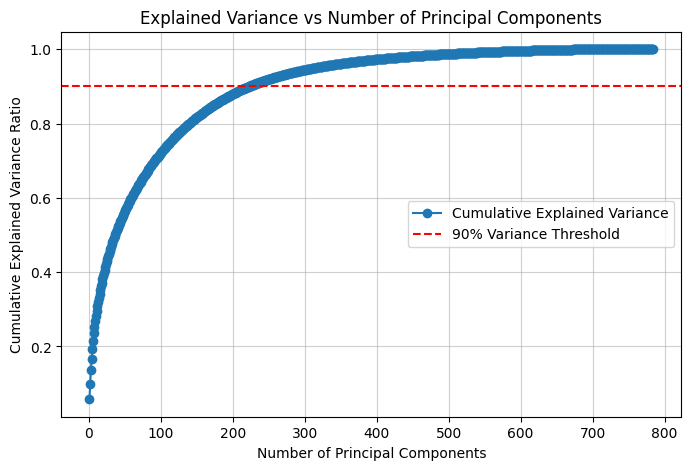

In [27]:
# --- Explained Variance Plot ---

# STEP 1: Compute covariance matrix on the standardized training data
cov_matrix = np.cov(X_train_scaled, rowvar=False)

# STEP 2: Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# STEP 3: Sort eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# STEP 4: Compute explained variance ratio
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# STEP 5: Plot Explained Variance with 90% line
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance,
         marker='o', label='Cumulative Explained Variance')

# Horizontal line at 90%
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')

plt.title('Explained Variance vs Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend(loc='center right')
plt.grid(True,alpha=0.6)
plt.show()


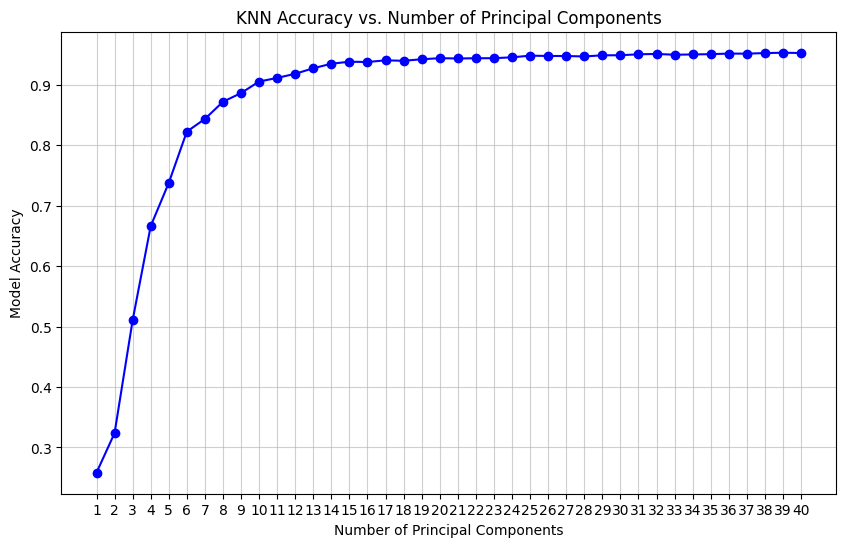

In [28]:
# --- 2. Plot the Results ---
plt.figure(figsize=(10, 6))
plt.plot(num_components_range, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Model Accuracy')
plt.xticks(num_components_range) # Ensures each component number is a tick on the x-axis
plt.grid(True,alpha=0.6)
plt.show()

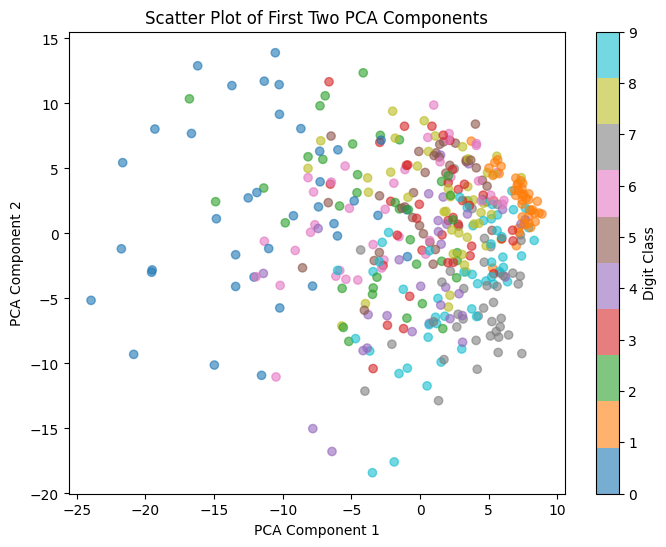

In [17]:
# Visualize first two PCA components with a reduced dataset
sample_size = 400
rand_idx = np.random.choice(X_train_trf.shape[0], sample_size, replace=False)

plt.figure(figsize=(8,6))
plt.scatter(X_train_trf[rand_idx, 0], X_train_trf[rand_idx, 1], c=y_train.iloc[rand_idx], cmap='tab10', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter Plot of First Two PCA Components')
plt.colorbar(label='Digit Class')
plt.show()

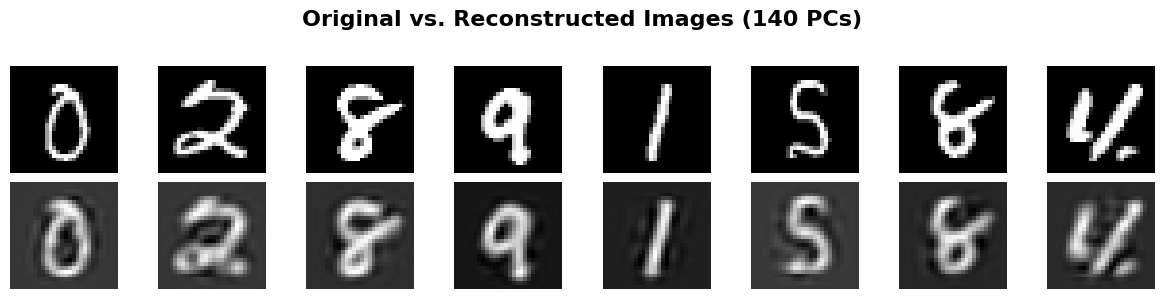

In [ ]:
# --- Visualizing Reconstructed Images ---

# 1. Define the number of components for reconstruction and number of images to show
n_components_to_show = 140
num_images_to_show = 8

# 2. Get the projection matrix for the desired number of components
_, _, projection_matrix = pca_scratch(X_train_scaled, X_test_scaled, n_components=n_components_to_show)

# 3. Transform the test data using the projection matrix
X_test_pca = np.dot(X_test_scaled, projection_matrix)

# 4. Perform the INVERSE transform (reconstruction)
# Project back to 784 dimensions
X_reconstructed_scaled = np.dot(X_test_pca, projection_matrix.T)
# Inverse the standardization to get pixel values
X_reconstructed = scaler.inverse_transform(X_reconstructed_scaled)

# 5. Plot the original and reconstructed images for comparison
plt.figure(figsize=(12, 3))
plt.suptitle(f'Original vs. Reconstructed Images ({n_components_to_show} PCs)', fontweight='bold', fontsize=16)

# Select 8 random indices from the test set
rand_indexes = np.random.randint(0, X_test.shape[0], num_images_to_show)

for i, index in enumerate(rand_indexes):
    # Plot Original Image (Top Row)
    plt.subplot(2, num_images_to_show, i + 1)
    original_img = X_test.iloc[index].values.reshape(28, 28)
    plt.imshow(original_img, cmap='gray')

    if i == 0:
        plt.ylabel("Original", fontweight='bold')
    plt.axis('off')

    # Plot Reconstructed Image (Bottom Row)
    plt.subplot(2, num_images_to_show, i + 1 + num_images_to_show)
    reconstructed_img = X_reconstructed[index].reshape(28, 28)
    plt.imshow(reconstructed_img, cmap='gray')

    if i == 0:
        plt.ylabel("Reconstructed", fontweight='bold')
    plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make space for suptitle
plt.show()